### Import Required Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

### Import the Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

## Preprocessing

### Text

In [6]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [7]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')

import re
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [8]:
corpus = []
ps = WordNetLemmatizer()

for i in range(0,train.shape[0]):
    text = re.sub('[^a-zA-Z]', ' ',train.iloc[i]['text'])
    text = text.lower().split()
    text = [ps.lemmatize(j) for j in text if not j in STOPWORDS]
    text = ' '.join(text)
    corpus.append(text)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(set(corpus))
corpus_cv = pd.DataFrame(tf.transform(train['text']).toarray(),columns=tf.get_feature_names_out())
corpus_test_cv = pd.DataFrame(tf.transform(test['text']).toarray(),columns=tf.get_feature_names_out())

### Keyword

In [10]:
train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [11]:
train['keyword'] = train['keyword'].apply(lambda x: x if type(x)==str else 'Missing Value')
test['keyword'] = test['keyword'].apply(lambda x: x if type(x)==str else 'Missing Value')

In [12]:
keyword_corpus = []
ps = WordNetLemmatizer()

for i in range(0,train.shape[0]):
    text = re.sub('[^a-zA-Z]', ' ',train.iloc[i]['keyword'])
    text = text.lower().split()
    text = [ps.lemmatize(j) for j in text if not j in STOPWORDS]
    text = ' '.join(text)
    keyword_corpus.append(text)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(set(keyword_corpus))
keyword = pd.DataFrame(tf.transform(train['keyword']).toarray(),columns=tf.get_feature_names_out())
keyword_test = pd.DataFrame(tf.transform(test['keyword']).toarray(),columns=tf.get_feature_names_out())

### Location

In [14]:
train['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [15]:
train['location'] = train['location'].apply(lambda x: x if type(x)==str else 'Missing Value2')
test['location'] = test['location'].apply(lambda x: x if type(x)==str else 'Missing Value2')

In [16]:
location_corpus = []
ps = WordNetLemmatizer()

for i in range(0,train.shape[0]):
    text = re.sub('[^a-zA-Z]', ' ',train.iloc[i]['location'])
    text = text.lower().split()
    text = [ps.lemmatize(j) for j in text if not j in STOPWORDS]
    text = ' '.join(text)
    location_corpus.append(text)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
tf.fit(set(location_corpus))
location = pd.DataFrame(tf.transform(train['location']).toarray(),columns=tf.get_feature_names_out())
location_test = pd.DataFrame(tf.transform(test['location']).toarray(),columns=tf.get_feature_names_out())

### Target

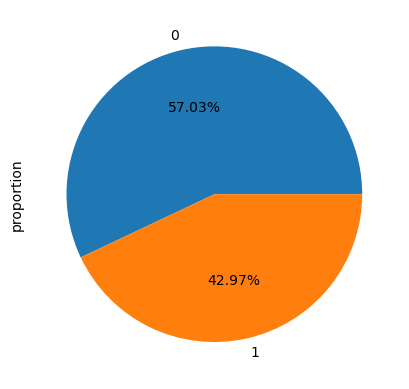

In [18]:
train['target'].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
plt.show()

# We can see that our data is almost balanced

### Model Building

In [19]:
xtrain = pd.concat([corpus_cv,keyword,location],axis=1)
xtest = pd.concat([corpus_test_cv,keyword_test,location_test],axis=1)

In [20]:
ytrain = train['target']

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [22]:
submission = pd.concat([test['id'],pd.DataFrame(ypred,columns=['target'])],axis=1)

In [23]:
submission.to_csv('Final.csv',index=False)